In [2]:
import urllib 

import pandas as pd
import numpy as np 

import dask.dataframe as dd
import dask.bag as db
import dask.diagnostics as dg

In [3]:
# Determine which stations we need
# {column name:extents of the fixed-width fields}
columns = {"ID": (0,11), "LATITUDE": (12, 20), "LONGITUDE": (21, 30), "ELEVATION": (31, 37),"STATE": (38, 40),
           "NAME": (41, 71), "GSN FLAG": (72, 75), "HCN/CRN FLAG": (76, 79),"WMO ID": (80, 85)}

In [5]:
df = pd.read_fwf("http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt", 
                    colspecs=list(columns.values()), names=list(columns.keys()),
                    dtype={'ID': str, 'LATITUDE':float, 'LONGITUDE':float, 
                           'ELEVATION':float, 'STATE':str, 'NAME':str, 
                           'GSN FLAG': str, 'HCN/CRN FLAG': str, 'WMO ID':str})

In [6]:
df[df['ID'].str.startswith('US')]['STATE'].unique()

array(['SD', 'CO', 'NE', 'AK', 'AL', 'AR', 'AZ', 'CA', 'TN', 'CT', 'DC',
       'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'PI', 'UM'], dtype=object)

In [7]:
# So lets get all the US country codes where the STATE is not in ['PR', 'VI'] 'cause it's easier to map
# Also we need a WMO ID 'cause thats how we cross reference against mos
# this is just a check that our filter is correct


In [8]:
mask = (df['ID'].str.startswith('US') & ~ df['STATE'].isin(['PR', 'VI']) & ~df['WMO ID'].isnull())
df[mask]['STATE'].unique()

array(['AZ', 'FL', 'GA', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MO',
       'MT', 'NH', 'SD', 'TX', 'UT', 'VT', 'WA', 'WI', 'AK', 'HI', 'CA',
       'CO', 'NM', 'OK', 'KS', 'NV', 'SC', 'WV', 'VA', 'NC', 'PA', 'KY',
       'TN', 'AL', 'LA', 'MS', 'AR', 'OR', 'ID', 'WY', 'NY', 'DE', 'IN',
       'OH', 'NJ', 'CT', 'RI', 'ND', 'NE'], dtype=object)

In [9]:
df[mask]


,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
88311,USC00026180,36.9208,-111.4483,1301.5,AZ,PAGE,NaN,NaN,72378
90722,USC00080211,29.7258,-85.0206,6.1,FL,APALACHICOLA AIRPORT,NaN,HCN,72220
91014,USC00088782,27.7053,-82.4008,12.2,FL,TAMPA BAY AREA WFO,NaN,NaN,72210
91103,USC00091544,31.8667,-81.6167,27.1,GA,FT STEWART,NaN,NaN,74780
91191,USC00093538,31.8694,-81.6236,28.0,GA,FT STEWART,NaN,NaN,74780
...,...,...,...,...,...,...,...,...,...
114296,USW00094996,40.6953,-96.8542,418.2,NE,LINCOLN 11 SW,NaN,CRN,74441
114297,USW00096404,62.7369,-141.2083,609.6,AK,TOK 70 SE,NaN,CRN,70292
114299,USW00096406,64.5014,-154.1297,78.9,AK,RUBY 44 ESE,NaN,CRN,70224
114300,USW00096407,66.5620,-159.0036,6.7,AK,SELAWIK 28 E,NaN,CRN,70170


In [10]:

# we're getting the list of US unique stations
us_stations = df[mask]
len(us_stations['ID'])

666

In [11]:
us_stations.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
88311,USC00026180,36.9208,-111.4483,1301.5,AZ,PAGE,NaN,NaN,72378
90722,USC00080211,29.7258,-85.0206,6.1,FL,APALACHICOLA AIRPORT,NaN,HCN,72220
91014,USC00088782,27.7053,-82.4008,12.2,FL,TAMPA BAY AREA WFO,NaN,NaN,72210
91103,USC00091544,31.8667,-81.6167,27.1,GA,FT STEWART,NaN,NaN,74780
91191,USC00093538,31.8694,-81.6236,28.0,GA,FT STEWART,NaN,NaN,74780


In [12]:
#Lets sample that!
#Do we really need all our stations?


In [10]:
%conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.72.0           |       h8e57a91_0        21.8 MB  conda-forge
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    cfitsio-3.470              |       hce51eda_6         1.3 MB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.5.0                |             py_0           8 KB  conda-forge
    curl-7.71.1                |       he644dc0_1         140 KB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fiona-1.8.13               |   py38h033e0f6_1         1.1 MB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    freexl-1.0.5            

In [12]:
#
import geopandas as gpd

In [13]:
gdf = gpd.GeoDataFrame(us_stations, geometry=gpd.points_from_xy(us_stations['LONGITUDE'], us_stations['LATITUDE']))


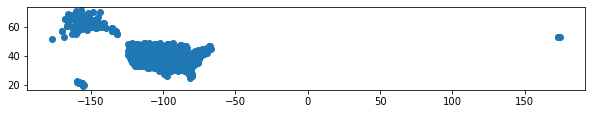

In [14]:
gdf.plot(figsize=(10,5))


In [15]:
gdf.sort_values('LONGITUDE', ascending=False).head()


,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID,geometry
113706,USW00045715,52.7167,174.1000,37.2,AK,SHEMYA USAF BASE,NaN,NaN,70414,POINT (174.10000 52.71670)
109028,USC00500452,52.8333,173.1833,21.3,AK,ATTU,NaN,NaN,70409,POINT (173.18330 52.83330)
113704,USW00045709,52.8000,173.1667,28.0,AK,ATTU NS,NaN,NaN,70409,POINT (173.16670 52.80000)
94657,USC00172426,44.9067,-66.9919,25.9,ME,EASTPORT,NaN,HCN,72608,POINT (-66.99190 44.90670)
114215,USW00094645,46.9600,-67.8833,224.6,ME,LIMESTONE 4 NNW,NaN,CRN,72710,POINT (-67.88330 46.96000)


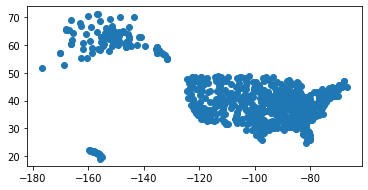

In [16]:
# let's drop them:
gdf_w = gdf[gdf['LONGITUDE']<0]
gdf_w.plot()

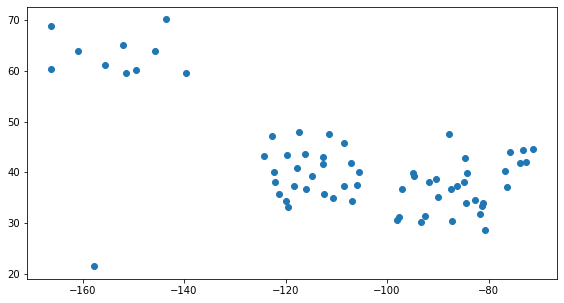

In [17]:
#We really don't need that dense of a network of plots, let's sample by 10 percent and see what happens
gdf_w.sample(frac=.10).plot(figsize=(10,5))


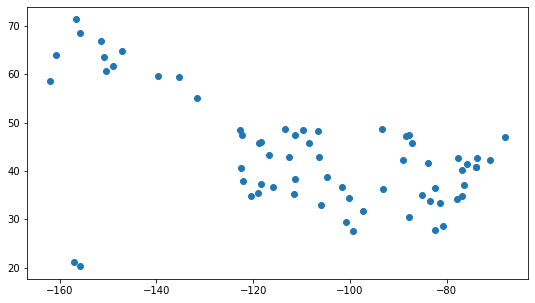

In [18]:
#1% which is about 6 stations
gdf_w.sample(frac=.10).plot(figsize=(10,5))


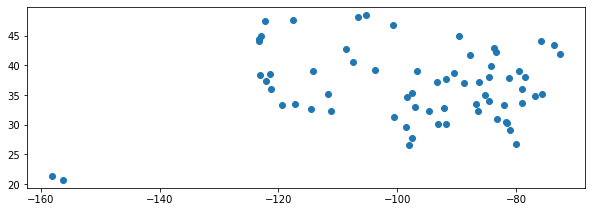

In [19]:

# try your own 
#frac = ? I will try 10%
gdf_w.sample(frac=.10).plot(figsize=(10,5))


In [20]:

# lets use the 60 stations from our sample to filter down our dataset
us_stations = gdf_w.sample(frac=.1)['ID']

In [21]:
#Filter MOS down to our sample set of stations
#OUR MOS codes aren't matching up w/ our WMO above so we're
#gonna find the nearest neighbors to the above stations
#This is a spreadsheet of where the mos stations are
mdf = pd.read_csv("https://www.weather.gov/source/mdl/tables/MOS_stationtable_20190702.csv")


In [22]:
# us stations only have 4 values
mosdf = mdf[mdf['Station'].str.len()==4]

In [23]:
mgdf = gpd.GeoDataFrame(mosdf,geometry=gpd.points_from_xy(mosdf['Longitude'], mosdf['Latitude']))


In [24]:
len(mgdf['Station'].unique())


2113

In [25]:
#Let's find our nearest neighbor
# compute distance between each station and all the others
def distance(row):
    return mgdf['geometry'].distance(row['geometry'])
    
distances = gdf_w.apply(distance, axis=1)

In [26]:
distances.shape # rows in gdf_w x rows in mgdf

(663, 2113)

In [27]:
# get the id of the closet station by finding the index of the station with the minimum distance
# and then create a new column in our gdf_w with the closest MOS station
stationloc = np.argmin(distances.values,axis=1)

In [28]:
stationloc.shape, mgdf.shape, gdf_w.shape

((663,), (2113, 8), (663, 10))

In [31]:
# from mgdf pull the station closest in distance to the gdf station for that row
gdf_w['neighbor'] = mgdf.iloc[stationloc]['Station'].values
gdf_w['distance'] = distances.min(axis=1)

In [32]:
# this is our lookup comparison
gdf_w[['ID', 'neighbor']].head()

,ID,neighbor
88311,USC00026180,KPGA
90722,USC00080211,KAAF
91014,USC00088782,KMCF
91103,USC00091544,KLHW
91191,USC00093538,KLHW


In [33]:
# this is our lookup comparison
gdf_w[['ID', 'neighbor']].head()

,ID,neighbor
88311,USC00026180,KPGA
90722,USC00080211,KAAF
91014,USC00088782,KMCF
91103,USC00091544,KLHW
91191,USC00093538,KLHW


In [37]:
#lets merge in the mgdf since we're going to end up wanting the center lat/lon for plotting
gdmo = gdf_w.merge(mgdf, left_on = 'neighbor', right_on='Station', suffixes=('_ghcn', '_mos'))

In [38]:
gdmo.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID,geometry_ghcn,neighbor,distance,Station,Station Name,State/Region,Latitude,Longitude,Elevation(ft),Products,geometry_mos
0,USC00026180,36.9208,-111.4483,1301.5,AZ,PAGE,NaN,NaN,72378,POINT (-111.44830 36.92080),KPGA,0.012615,KPGA,PAGE ASOS,AZ,36.9333,-111.4500,4278,mex mav00 mav06 mav12 mav18 rfc met,POINT (-111.45000 36.93330)
1,USW00003162,36.9261,-111.4478,1313.7,AZ,PAGE MUNI AP,NaN,NaN,72371,POINT (-111.44780 36.92610),KPGA,0.007529,KPGA,PAGE ASOS,AZ,36.9333,-111.4500,4278,mex mav00 mav06 mav12 mav18 rfc met,POINT (-111.45000 36.93330)
2,USC00080211,29.7258,-85.0206,6.1,FL,APALACHICOLA AIRPORT,NaN,HCN,72220,POINT (-85.02060 29.72580),KAAF,0.008453,KAAF,APALACHICOLA,FL,29.7333,-85.0167,20,mex mav00 mav06 mav12 mav18 met,POINT (-85.01670 29.73330)
3,USW00012832,29.7333,-85.0333,5.8,FL,APALACHICOLA AP,NaN,NaN,72220,POINT (-85.03330 29.73330),KAAF,0.016600,KAAF,APALACHICOLA,FL,29.7333,-85.0167,20,mex mav00 mav06 mav12 mav18 met,POINT (-85.01670 29.73330)
4,USC00088782,27.7053,-82.4008,12.2,FL,TAMPA BAY AREA WFO,NaN,NaN,72210,POINT (-82.40080 27.70530),KMCF,0.175439,KMCF,MAC DILL AFB,FL,27.8500,-82.5000,13,mex mav00 mav06 mav12 mav18 met,POINT (-82.50000 27.85000)


In [39]:
#let's save out what we need:
gdmo[['ID', 'LATITUDE', 'LONGITUDE', 'Station', 'Latitude', 'Longitude']].to_csv("ghcn_mos_lookup.csv")


In [37]:
# the above lines up w/ mos, let's filter GHCN down to the us_stations
%conda install s3fs

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - s3fs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boto3-1.14.35              |     pyh9f0ad1d_0          69 KB  conda-forge
    botocore-1.17.35           |     pyh9f0ad1d_0         4.0 MB  conda-forge
    docutils-0.15.2            |           py38_0         735 KB  conda-forge
    jmespath-0.10.0            |     pyh9f0ad1d_0          21 KB  conda-forge
    s3fs-0.4.2                 |             py_0          21 KB  conda-forge
    s3transfer-0.3.3           |   py38h32f6830_1          91 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INSTALLED:

  boto3              conda-forge/noarch::boto3-1.14.35-pyh9f0ad1d_0
  botocore           

In [40]:
# the above lines up w/ mos, let's filter GHCN down to the us_stations
YEAR = 2019
names = ['ID', 'DATE', 'ELEMENT', 'DATA_VALUE', 'M-FLAG', 'Q-FLAG', 'S-FLAG', 'OBS-TIME']
ds = dd.read_csv(f's3://noaa-ghcn-pds/csv/{YEAR}.csv', storage_options={'anon':True},  
                 names=names, dtype={'DATA_VALUE':'object'})


In [41]:
# Here we're filtering to just the rows where these conditions are met
dsus = ds[ds['ID'].isin(gdmo['ID']) & ds['ELEMENT'].isin(['PRCP', 'TMAX', 'TMIN'])]
dsus.head()

,ID,DATE,ELEMENT,DATA_VALUE,M-FLAG,Q-FLAG,S-FLAG,OBS-TIME
52042,USC00088782,20190101,TMAX,278,NaN,NaN,7,2400.0
52043,USC00088782,20190101,TMIN,172,NaN,NaN,7,2400.0
52045,USC00088782,20190101,PRCP,0,NaN,NaN,7,2400.0
52256,USC00093538,20190101,TMAX,267,NaN,NaN,7,1600.0
52257,USC00093538,20190101,TMIN,183,NaN,NaN,7,1600.0


In [43]:
# Lets only get the columns we want
dsus_subset = dsus[['ID', 'DATE', 'ELEMENT', 'DATA_VALUE',  'M-FLAG', 'Q-FLAG']]
dsus_subset.head()

,ID,DATE,ELEMENT,DATA_VALUE,M-FLAG,Q-FLAG
52042,USC00088782,20190101,TMAX,278,NaN,NaN
52043,USC00088782,20190101,TMIN,172,NaN,NaN
52045,USC00088782,20190101,PRCP,0,NaN,NaN
52256,USC00093538,20190101,TMAX,267,NaN,NaN
52257,USC00093538,20190101,TMIN,183,NaN,NaN


In [44]:

# let's save out to a single largeish CSV for the GHCN data, 
sample = 100
dsus.compute().to_csv(f"GHCN_{YEAR}.csv")

In [30]:
#Filter MOS down to just stations in our lookup
columns = ['station', 'short_model', 'model', 'runtime', 'ftime', 'N/X', 'X/N',
           'TMP', 'DPT', 'WDR', 'WSP', 'CIG', 'VIS', 'P06', 'P12', 'POS', 'POZ',
           'SNW', 'CLD', 'OBV', 'TYP', 'Q06', 'Q12', 'T06', 'T12']
mos = dd.read_csv(f'mos/modelrun/mav{YEAR}*.csv', names=columns)

In [31]:
mos.head()

,station,short_model,model,runtime,ftime,N/X,X/N,TMP,DPT,WDR,...,POS,POZ,SNW,CLD,OBV,TYP,Q06,Q12,T06,T12
0,station,short_model,model,runtime,ftime,N/X,X/N,TMP,DPT,WDR,...,POS,POZ,SNW,CLD,OBV,TYP,Q06,Q12,T06,T12
1,PWAK,GFS,GFS MOS GUIDANCE,2019-01-31 00:00:00+00:00,2019-01-31 06:00:00,NaN,NaN,73,62,36,...,NaN,NaN,NaN,FW,NaN,NaN,NaN,NaN,NaN,NaN
2,PWAK,GFS,GFS MOS GUIDANCE,2019-01-31 00:00:00+00:00,2019-01-31 09:00:00,NaN,NaN,72,63,02,...,NaN,NaN,NaN,FW,NaN,NaN,NaN,NaN,NaN,NaN
3,PWAK,GFS,GFS MOS GUIDANCE,2019-01-31 00:00:00+00:00,2019-01-31 12:00:00,NaN,NaN,72,61,03,...,NaN,NaN,NaN,SC,NaN,NaN,NaN,NaN,NaN,NaN
4,PWAK,GFS,GFS MOS GUIDANCE,2019-01-31 00:00:00+00:00,2019-01-31 15:00:00,NaN,NaN,72,62,04,...,NaN,NaN,NaN,SC,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# row filters
#N/X = nighttime minimum/daytime maximum surface temperatures.
#TMP = surface temperature valid at that hour.
#Q06 = quantitative precipitation forecast (QPF) category for liquid equivalent precipitation amount during a 6-h period ending at that time.
#Q12 = QPF category for liquid equivalent precipitation amount during a 12-h period ending at the indicated time.
mosus = mos[mos['station'].isin(gdmo['Station'])]

In [34]:
# column filter
mosv = mosus[['station', 'runtime', 'ftime', 'N/X', 'X/N','Q06', 'Q12']]

In [35]:
# save to csv , compute turns it to a dataframe so we only have 1 file to worry about
mosv.compute().to_csv(f"MOS_{YEAR}.csv")

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)




In [57]:
#Not using seaborns
#titanic = sns.load_dataset("titanic")
#sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);
